# AO3 Project
## Tags Assessment


### Introduction
___

This document will contain analysis of the AO3 tags. We start by assessing a sample data set.

In [59]:
import pandas as pd
import csv
import sqlite3

# Assessing Top Tags
data = pd.read_csv("small_story_tags.csv")
try:
    data= data.drop(columns=["Unnamed: 0.1", "Unnamed: 0"])
except:
    pass

# Top 20 Tags
counts = data["tagId"].value_counts()

# 1000 

---
Goals with assessing tags: most popular fandoms, most popular tags within each fandom.

In [76]:
import pandas as pd
import csv
import sqlite3

conn = sqlite3.connect("organizedData.sqlite3")

dict = {}
name_list = []
occur_amount = []
for value in counts.index.to_list():
    
    # Beks add type
    query_1 = f"SELECT id, name, type FROM Tags WHERE id = {value}"
    df = pd.read_sql_query(query_1, conn)
    key_1 = df.loc[0, "id"]
    value_1 = df.loc[0, "name"]
    id_type = df.loc[0, "type"]
    dict[key_1] = [value_1, counts[key_1]]
    name_list.append(value_1)
    occur_amount.append(counts[key_1])
print(dict)   
    
conn.close()

print(dict)

{1: ['No Archive Warnings Apply', 354], 17: ['M/M', 198], 38: ['Gen', 133], 9: ['Creator Chose Not To Use Archive Warnings', 74], 44: ['F/M', 66], 15: ['Angst', 38], 213: ['Multi', 32], 105: ['F/F', 29], 187: ['First Time', 28], 98: ['Harry Potter - Rowling', 28], 116: ['Drama', 28], 250: ['Humor', 25], 20: ['Stargate Atlantis', 24], 102: ['Drabble', 24], 177: ['Buffy the Vampire Slayer', 22], 103: ['Alternate Universe', 22], 256: ['Episode Related', 20], 42: ['Crossover', 20], 738: ['The X-Files', 17], 287: ['Romance', 17], 286: ['Established Relationship', 17], 168: ['due South', 16], 28: ['Firefly', 16], 90: ['Supernatural', 16], 189: ['Torchwood', 16], 2: ['Other', 15], 741: ['Fox Mulder', 14], 31: ['Major Character Death', 14], 190: ['Jack Harkness', 14], 22: ['John Sheppard', 14], 39: ['Highlander: The Series', 13], 21: ['Rodney McKay', 13], 413: ['Graphic Depictions Of Violence', 13], 41: ['Methos', 12], 163: ['House M.D.', 12], 740: ['Alex Krycek', 11], 492: ['Ianto Jones', 11]

In [61]:
top_25 = pd.DataFrame({"Tag Name": name_list,
                  "Total Uses": occur_amount})
print(top_25)

                                       Tag Name  Total Uses
0                     No Archive Warnings Apply         354
1                                           M/M         198
2                                           Gen         133
3     Creator Chose Not To Use Archive Warnings          74
4                                           F/M          66
...                                         ...         ...
1889                                 Cho Hakkai           1
1890                                  Sha Gojyo           1
1891                      Go Dougan/Genjo Sanzo           1
1892                           Past Child Abuse           1
1893                                  Zack Hall           1

[1894 rows x 2 columns]


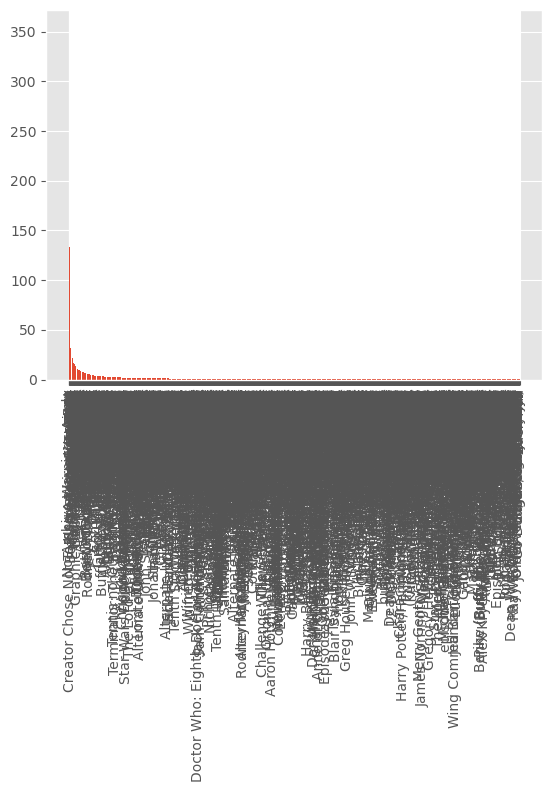

In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

# Graphing our Series
plt.bar(top_25.index.to_list(), top_25["Total Uses"])
plt.xticks(top_25.index.to_list(), top_25["Tag Name"], rotation = 90)
plt.show()


In [72]:
chapter_stuff = pd.read_csv("reduced_chapter_text.csv")
pd.set_option("display.max_columns", None)
print(chapter_stuff)


      Unnamed: 0  storyId  chapterNumber  \
0              0        3              0   
1              1       35              0   
2              2       63              0   
3              3       87              0   
4              4      123              0   
...          ...      ...            ...   
5995        5995   113940              0   
5996        5996   113961              0   
5997        5997   113984              0   
5998        5998   114006              0   
5999        5999   114027              0   

                                                   text  
0     It requires a very unusual mind to undertake t...  
1     I told Gilina I could have fallen in love with...  
2     Sometimes life just seemed to happen to Rodney...  
3     "Hey, Doc," Jayne said as he breezed into the ...  
4     My friend, and lately, confidante, Arabella Bl...  
...                                                 ...  
5995  I can't believe it. I am caught like a spider ...  
5996  "

In [74]:
chapters_cool = chapter_stuff.iloc[8:30]
chapters_cool

,Unnamed: 0,storyId,chapterNumber,text
8,8,247,0,Balanced on the blade of a fan / churning the ...
9,9,268,0,"Michael Bluth took a deep breath, steeling him..."
10,10,290,0,"""I've got it. The perfect idea."" Jane dragged ..."
11,11,319,0,excerpts from the journals of Sir Ernest Shack...
12,12,340,0,Five Drinks\n\nby Kass\n\nNotes:\n\nMany thank...
13,13,361,0,"*\n\nThe heat makes Dean sleepy, cranked up so..."
14,14,387,0,*\n\n1. \n\nWhen John turns fifteen his father...
15,15,422,0,“You’re going to live here?” James was all eye...
16,16,451,0,First thing she did when she made Duluth was t...
17,17,474,0,John already knows the taste of their blood.\n...
